<a href="https://colab.research.google.com/github/lizzard2003/Earthquake1970/blob/main/notebook58fdf97a2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'geospatial-learn-course-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F348259%2F695175%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T133638Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09f428185d590a7f082f7b06dfc638ccfdfcf5d411e47328467e33e5421f9946758e04a2f1534b158f882b317590e38b558cd4b1df8f48b783c08b3867cf98744e7f0860299f0329cc089c2ab41893d8dbe75fab2412c5335418b40d13efd1cb3424c51c1141104bb3e74893678a937861871f49676771d3fea1a30eb84d1ba8389aab615deee84c0df696776837f21b497ce106c57f05a7b0efc4ff471fb5e483c586158d1ac34164588919dcd072be9d77d5669cd8c5be5c4b7eb485a41b52e4cc1ee30fdb33a673a5d582cc5ab2f174833f19838df6c4ba987308b787182a3c01a8b96a5307e3d7c367ddf52b5f7d3addc69393114a8f99d839d58894f097'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 244538909 bytes downloaded
Downloaded and uncompressed: geospatial-learn-course-data
Data source import complete.


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/CA_county_boundaries/CA_county_boundaries/CA_county_boundaries.shx
/kaggle/input/geospatial-learn-course-data/CA_county_boundaries/CA_county_boundaries/CA_county_boundaries.shp
/kaggle/input/geospatial-learn-course-data/CA_county_boundaries/CA_county_boundaries/CA_county_boundaries.prj
/kaggle/input/geospatial-learn-course-data/CA_county_boundaries/

In [28]:
filepath='/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv'
earthquakes1970=gpd.read_file(filepath) # you are reading the file here earthquakes is the name of the table

earthquakes1970 # this print the data that was retrieved

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,geometry
0,1970/01/04 17:00:40.20,24.138999999999900,102.503000000000000,31.00,7.50,Ms,90,,,0.000000000000000,NEI,1970010440,None
1,1970/01/06 05:35:51.80,-9.628000000000000,151.458000000000000,8.00,6.20,Ms,85,,,0.000000000000000,NEI,1970010640,None
2,1970/01/08 17:12:39.10,-34.741000000000000,178.568000000000000,179.00,6.10,Mb,59,,,0.000000000000000,NEI,1970010840,None
3,1970/01/10 12:07:08.60,6.825000000000000,126.736999999999000,73.00,6.10,Mb,91,,,0.000000000000000,NEI,1970011040,None
4,1970/01/16 08:05:39.00,60.280000000000000,-152.660000000000000,85.00,6.00,ML,0,,,,AK,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,2013/12/01 06:29:57.80,2.044000000000000,96.826099999999900,20.00,6.00,Mw,,27,1,0.890000000000000,us,2013120120,None
5300,2013/12/08 17:24:54.20,44.443800000000000,149.166699999999000,28.00,6.10,Mw,,26,5,0.990000000000000,us,2013120820,None
5301,2013/12/17 23:38:08.10,20.763500000000000,146.759899999999000,16.06,6.20,Mw,,14,4,0.740000000000000,us,2013121720,None
5302,2014/01/01 16:03:28.89,-13.877900000000000,167.243400000000000,187.00,6.50,Mw,,14,4,0.670000000000000,us,2014010120,None


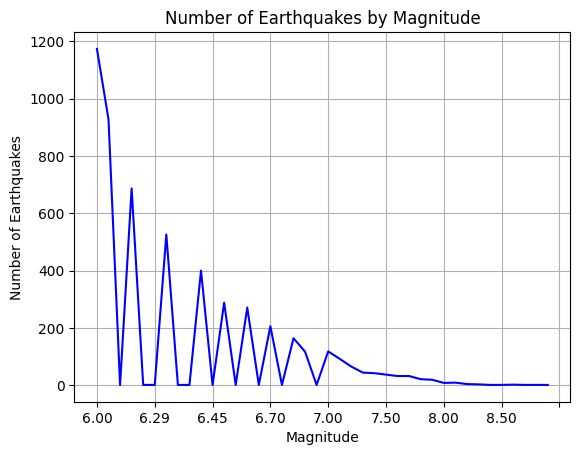

In [31]:


from matplotlib import pyplot as plt

# Group earthquakes by 'Magnitude' and calculate the size of each group
earthquake_counts = earthquakes1970.groupby('Magnitude').size()

# Plot a line graph
earthquake_counts.plot(color='blue')

# Customize the plot
plt.title('Number of Earthquakes by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()


# **First 5 Magnitudes Sizes**

In [25]:
earthquakes1970.head() # this reads the first 5 rows its counts it by index

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,geometry
0,1970/01/04 17:00:40.20,24.138999999999900,102.503000000000000,31.00,7.50,Ms,90,,,0.000000000000000,NEI,1970010440,None
1,1970/01/06 05:35:51.80,-9.628000000000000,151.458000000000000,8.00,6.20,Ms,85,,,0.000000000000000,NEI,1970010640,None
2,1970/01/08 17:12:39.10,-34.741000000000000,178.568000000000000,179.00,6.10,Mb,59,,,0.000000000000000,NEI,1970010840,None
3,1970/01/10 12:07:08.60,6.825000000000000,126.736999999999000,73.00,6.10,Mb,91,,,0.000000000000000,NEI,1970011040,None
4,1970/01/16 08:05:39.00,60.280000000000000,-152.660000000000000,85.00,6.00,ML,0,,,,AK,,None


In [12]:
magSize_column = earthquakes1970['Magnitude'] # renaming my Magnitude column to be more specific on the Size
print(magSize_column.head()) # Grabbing the first 5 magnitude sizes from the Magnitude column

0    7.50
1    6.20
2    6.10
3    6.10
4    6.00
Name: Magnitude, dtype: object


## **What is the mean of all the the Magnitudes?**

In [16]:

earthquakes1970.dropna(subset=['Magnitude'], inplace=True) # dropping the rows with missing values


earthquakes1970['Magnitude'] = pd.to_numeric(earthquakes1970['Magnitude'], errors='coerce') # Convert 'Magnitude' column to numeric data type

# Calculate the mean of the 'Magnitude' column
magnitude_mean = earthquakes1970['Magnitude'].mean()

# Print the mean magnitude
print("The magnitude mean is:", magnitude_mean)


The magnitude mean is: 6.369113876319759


# What is the Max Magnitude felt in 1970?

In [21]:

max_mag=earthquakes1970['Magnitude'].max()
print("The Maximum Magnitude of an earthquake in 1970 is :", max_mag)

The Maximum Magnitude of an earthquake in 1970 is : 9.1


# Where where the earthquakes located?

In [23]:
# Assuming 'earthquakes1970' is your DataFrame containing earthquake data

# Convert 'Date' column to datetime if it's not already
earthquakes1970['Date'] = pd.to_datetime(earthquakes1970['Date'])

# Set 'Date' column as the index
earthquakes1970.set_index('Date', inplace=True)

# Plot time series of earthquake frequency
earthquakes1970.resample('M').size().plot(color='orange')
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


KeyError: 'Date'